<h1>Data Profiling</h1><h2 align="center">Data Granularity</h2>

In [1]:
from pandas import DataFrame, read_csv
import numpy as np

filename = "../../../data/class_pos_covid.csv"
file_tag = "health"
target = "CovidPos"

#filename = "../../../data/class_credit_score.csv"
#file_tag = "service"
#target = "Credit_Score"
data: DataFrame = read_csv(filename, na_values="")

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380932 entries, 0 to 380931
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      380932 non-null  object 
 1   Sex                        380932 non-null  object 
 2   GeneralHealth              379975 non-null  object 
 3   PhysicalHealthDays         371944 non-null  float64
 4   MentalHealthDays           373512 non-null  float64
 5   LastCheckupTime            374139 non-null  object 
 6   PhysicalActivities         380127 non-null  object 
 7   SleepHours                 376556 non-null  float64
 8   RemovedTeeth               371702 non-null  object 
 9   HadHeartAttack             378555 non-null  object 
 10  HadAngina                  377285 non-null  object 
 11  HadStroke                  379748 non-null  object 
 12  HadAsthma                  379555 non-null  object 
 13  HadSkinCancer              37

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PhysicalHealthDays,371944.0,4.384991,8.742091,0.00,0.00,0.00,3.00,30.00
MentalHealthDays,373512.0,4.415732,8.404087,0.00,0.00,0.00,5.00,30.00
SleepHours,376556.0,7.022823,1.491101,1.00,6.00,7.00,8.00,24.00
HeightInMeters,372301.0,1.702571,0.107171,0.91,1.63,1.70,1.78,2.41
WeightInKilograms,360571.0,83.217059,21.485738,22.68,68.04,81.19,95.25,292.57
BMI,355324.0,28.586092,6.571412,12.02,24.14,27.44,31.84,99.64


In [4]:
data.describe(exclude=np.number).T

,count,unique,top,freq
State,380932,54,Washington,22388
Sex,380932,2,Female,201499
GeneralHealth,379975,5,Very good,127352
LastCheckupTime,374139,4,Within past year (anytime less than 12 months ...,301086
PhysicalActivities,380127,2,Yes,288481
RemovedTeeth,371702,4,None of them,198338
HadHeartAttack,378555,2,No,356585
HadAngina,377285,2,No,353890
HadStroke,379748,2,No,362969
HadAsthma,379555,2,No,321806


In [5]:
from pandas import DataFrame


def derive_drug_variable(df: DataFrame) -> DataFrame:
    no_drinker = df["AlcoholDrinkers"]=="Yes"
    no_smoker = df["SmokerStatus"]=="Never smoked"
    no_esmoker = df["ECigaretteUsage"] == "Never used e-cigarettes in my entire life"
    df["NoDrugs"] = no_drinker & no_smoker
    return df

def derive_disease_variable(df: DataFrame) -> DataFrame:
    df["hadHealthIssue"] = (df.HadHeartAttack == "Yes") | (df.HadAngina == "Yes") | (df.HadStroke == "Yes") | (df.HadAsthma == "Yes") | (df.HadSkinCancer == "Yes") | (df.HadCOPD == "Yes") | (df.HadDepressiveDisorder == "Yes") | (df.HadKidneyDisease == "Yes") | (df.HadArthritis == "Yes") | (df.HadDiabetes == "Yes")
    return df

def get_region(state):
    northeast_states = {'District of Columbia', 'Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New York', 'New Jersey', 'Pennsylvania'}
    midwest_states = {'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin'}
    south_states = {'Alabama', 'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Maryland', 'Mississippi', 'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'West Virginia'}
    west_states = {'Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming'}
    territories = {'Puerto Rico', 'Guam', 'Virgin Islands', 'American Samoa', 'Northern Mariana Islands'}

    
    if state in northeast_states:
        return 'Northeast'
    elif state in midwest_states:
        return 'Midwest'
    elif state in south_states:
        return 'South'
    elif state in west_states:
        return 'West'
    elif state in territories:
        return 'Territory'
    else:
        return 'Unknown Region'

def derive_region_variable(df):
    df["Region"] = df["State"].apply(get_region)
    return df

data = derive_drug_variable(data)
data = derive_disease_variable(data)
data = derive_region_variable(data)


In [6]:
data.Region

0             South
1             South
2             South
3             South
4             South
            ...    
380927    Territory
380928    Territory
380929    Territory
380930    Territory
380931    Territory
Name: Region, Length: 380932, dtype: object

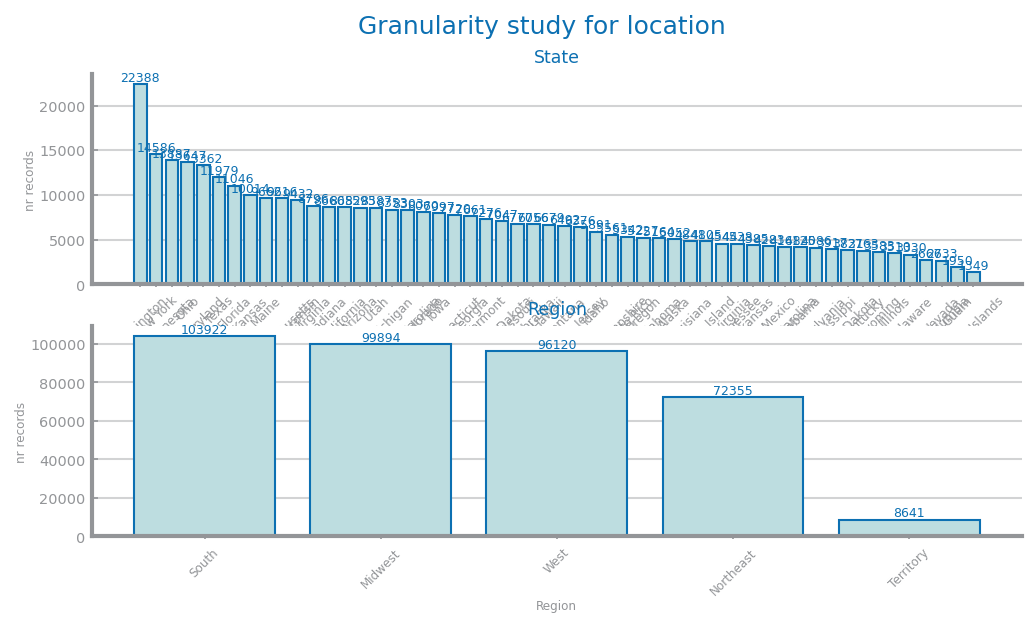

In [13]:
from numpy import ndarray
from pandas import Series, read_csv
from matplotlib.figure import Figure
from matplotlib.pyplot import subplots, savefig, show
from dslabs_functions import get_variable_types, plot_bar_chart, HEIGHT

def analyze_location(data: DataFrame):
    vars = ["State", "Region"]
    rows: int = len(vars)
    fig, axs = subplots(rows, 1, figsize=(rows * HEIGHT, HEIGHT), squeeze=False)
    fig.suptitle(f"Granularity study for location")
    for i in range(rows):
        counts: Series[int] = data[vars[i]].value_counts()
        plot_bar_chart(
            counts.index.to_list(),
            counts.to_list(),
            ax=axs[i, 0],
            title=vars[i],
            xlabel=vars[i],
            ylabel="nr records",
            percentage=False,
        )
    return axs


analyze_location(data)
savefig(f"images/{file_tag}_granularity_location.png")
show()